## 混同行列によってそのモデルの傾向をつかむ
- TP(真陽性)
予測ラベルが陽性、正解ラベルが陽性
- FP(偽陽性)
予測ラベルが陽性、正解ラベルが陰性
- FN(偽陰性)
予測ラベルが陰性、正解ラベルが陽性
※病気だとここが危険
- TN(真陰性)
予測ラベルが陰性、正解ラベルが陰性

In [1]:
#混同行列を出力してみる
# 必要なライブラリを読込
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# versicolorとversinicaの二値分類をする
#　線形分離不可能
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[50:, [0, 2]]
y_1 = iris.target[50:]

# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear', C=1.0)
svc_1.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
# sklearnのconfusion_matrixで出力できる
# 混合行列のarrayを作成
# (正解ラベル, 予測ラベル)
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_1_test, svc_1.predict(X_1_test))
cm_1

array([[13,  2],
       [ 1, 14]])

In [5]:
# 混合行列をグラフでプロットする関数
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

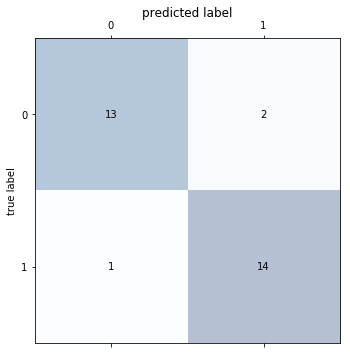

In [6]:
# 混同行列をグラフでプロット
plot_cm(cm_1)

病気では偽陰性が最も危険なので再現率としてTP/(TP+FN)を定義する
FNが小さくなるほど小さくなる